## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'<br>

---

# 2. 구 별 이동인구 분석
### 서울시 생활이동 정보를 기반으로 서울시 자치구 별 이동인구를 분석합니다

In [ ]:
# 필요 라이브러리를 설치합니다.
%pip install pandas seaborn

## 데이터 안내

[데이터 파일명]
* 2. seoul_moving.csv

[데이터 정보]
* 서울 시 구별 이동 2022년 4월 데이터

[데이터 컬럼 정보]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만(0~3)의 경우 * 처리

---

# 2.1.데이터 불러오기

#### [2.1.1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '2. seoul_moving.csv'파일을 'seoul_moving' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요
        * index column은 0번 열 입니다
    * 데이터를 불러올 때 오류가 발생한다면, 오류에 대해 직접 검색하여 해결해보세요.

In [2]:
# 아래에 코드를 작성하고 결과를 확인합니다.
import pandas as pd
import numpy as np

seoul_moving = pd.read_csv('2. seoul_moving.csv', encoding='UTF8')
seoul_moving.head()

,Unnamed: 0,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [3]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(28923054, 11)

In [4]:
seoul_moving.drop('Unnamed: 0', axis=1, inplace=True)
print(seoul_moving.shape)
seoul_moving.head()

(28923054, 10)


,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


---

# 2.2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [2.2.1] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head', 'tail' 등 전부 활용해 보세요.

In [5]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


In [6]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28923054 entries, 0 to 28923053
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.2+ GB


In [7]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [8]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_moving.tail()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
28923049,202204,토,23,39000,11250,M,45,EH,50,3.16
28923050,202204,토,23,39000,11250,M,50,EH,70,3.27
28923051,202204,토,23,39000,11250,M,55,EE,50,3.31
28923052,202204,토,23,39000,11250,M,55,EH,50,3.28
28923053,202204,토,23,39000,11250,M,75,EH,30,5.94


* [참고] 1번 열의 의미
    * " 2022년 4월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [2.2.2] 결측치 처리 (NaN이 아닌 결측치 처리)

* '이동인구(합)' column은 이동 인구의 합산인데 숫자가 아닌 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만 즉, 값이 0~3일 경우 별표 * 처리)

    - 해당 값을 어떻게 처리하는 것이 좋을 지 생각해보아서 각자의 방법으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [9]:
# 이동인구(합) 컬럼의 값 별로 개수를 세어봅니다.
seoul_moving['이동인구(합)'].value_counts()

*          3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [10]:
# 별표(*)로 표현된 값을 대체합니다.
# 해당 값을 어떻게 처리하는 것이 좋을 지 생각해보아서 각자의 방법으로 변경하세요
#(ex: 최빈값, 평균값도 알 수 없으므로 0~3의 중위값인 1.5로 대체)
seoul_moving['이동인구(합)'].replace({'*':'1.5'}, inplace=True)
seoul_moving['이동인구(합)'].value_counts()

1.5        3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [57]:
seoul_moving.loc[seoul_moving['도착시간'].between(7,10,inclusive='both'),['이동인구(합)']].value_counts()

이동인구(합) 
1.50        597910
3.30         68279
6.05         59669
3.29         48215
3.31         38160
             ...  
624.27           1
624.17           1
624.12           1
624.11           1
14665.46         1
Length: 73616, dtype: int64

In [56]:
seoul_moving.loc[seoul_moving['도착시간'].between(7,10,inclusive='both')&seoul_moving['요일'].isin(['월','화','수','목','금']),['이동인구(합)']].value_counts()

이동인구(합) 
1.50        423244
3.30         48604
6.05         41249
3.29         34278
3.31         27241
             ...  
567.01           1
566.91           1
566.87           1
566.86           1
14665.46         1
Length: 69617, dtype: int64

In [55]:
seoul_moving.loc[seoul_moving['도착시간'].between(17,20,inclusive='both'),['이동인구(합)']].value_counts()

이동인구(합) 
1.50        840688
6.05         86564
3.30         78044
3.29         64334
3.31         50762
             ...  
722.17           1
722.15           1
722.14           1
722.11           1
14030.11         1
Length: 84524, dtype: int64

In [11]:
# 이동인구(합) 컬럼의 값 별로 개수를 다시 세어봅니다.
seoul_moving['이동인구(합)'].value_counts()

1.5        3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [12]:
# 이제 이동인구(합) column의 데이터 타입을 바꿔주세요
seoul_moving = seoul_moving.astype({'이동인구(합)':'float64'})
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28923054 entries, 0 to 28923053
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.2+ GB


#### [2.2.3] 이동유형, 요일, 성별 변수의 value수 파악

In [13]:
# 이동유형 컬럼의 값 별로 개수를 세어봅니다.
# H(야간상주지), W(주간상주지), E(기타)
seoul_moving['이동유형'].value_counts()

EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: 이동유형, dtype: int64

In [14]:
# 요일 컬럼의 값 별로 개수를 세어봅니다.
seoul_moving['요일'].value_counts()

토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: 요일, dtype: int64

* [참고] 2022년 4월의 요일 수는 다음과 같습니다.
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5

In [15]:
# 성별 컬럼의 값 별로 개수를 세어봅니다.
seoul_moving['성별'].value_counts()


M    16355029
F    12568025
Name: 성별, dtype: int64

#### [2.2.4] 심야 이동이 가장 많은 요일 확인

In [17]:
# 아래에 코드를 작성하고 결과를 확인합니다.
# 심야시간은 0:00~ 4:59
seoul_moving.loc[seoul_moving['도착시간'].isin([0,1,2,3,4]),'요일'].value_counts()


토    423995
금    359012
일    331392
목    308651
수    303357
화    292786
월    273062
Name: 요일, dtype: int64

In [19]:
print(seoul_moving.info())
seoul_moving.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28923054 entries, 0 to 28923053
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.2+ GB
None


,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


#### [2.2.5] 서울 지역의 데이터만 추출

* 서울시의 데이터만 필요하므로 출발과 도착이 모두 서울인 데이터만 추출하세요.
* 아래 사이트에서 서울시 데이터만 추출하기 위해 필요한 정보를 탐색해보세요. (ex. 자치구 코드 정보)
https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

In [22]:
# 출발 시군구 코드, 도착 시군구 코드 활용하여 출발과 도착이 모두 서울인 데이터만 추출해보세요.
data = seoul_moving.loc[seoul_moving['출발 시군구 코드'].between(11000, 11250, inclusive='both')]
data = data.loc[data['도착 시군구 코드'].between(11000, 11250, inclusive='both')]
data.head(30)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
5,202204,일,0,11010,11010,F,10,WH,10,17.89
6,202204,일,0,11010,11010,F,15,EH,10,114.23
7,202204,일,0,11010,11010,F,15,HH,20,20.07
8,202204,일,0,11010,11010,F,15,HE,10,8.03
9,202204,일,0,11010,11010,F,15,HW,10,8.04


#### [2.2.6] 서울지역의 구 별로 groupby하여 데이터를 확인해보세요. (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* [참고] 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [26]:
# 아래에 코드를 작성하고 결과를 확인합니다.
data.groupby('출발 시군구 코드',as_index=False)['이동인구(합)'].sum().sort_values('이동인구(합)', ascending=False)
# 유출 제일 많은 구 : 강남구, 적은 구 : 금천구

,출발 시군구 코드,이동인구(합)
22,11230,46220924.63
23,11240,36207933.02
21,11220,29698071.20
18,11190,25835980.43
13,11140,24517465.86
15,11160,22526485.94
24,11250,22035184.61
10,11110,21392595.19
1,11020,20296645.78
0,11010,19862431.70


In [27]:
# 아래에 코드를 작성하고 결과를 확인합니다.
data.groupby('도착 시군구 코드',as_index=False)['이동인구(합)'].sum().sort_values('이동인구(합)', ascending=False)
# 유입이 제일 많은 구 : 강남구, 적은 구 : 금천구 

,도착 시군구 코드,이동인구(합)
22,11230,46152613.40
23,11240,36156898.50
21,11220,29763430.80
18,11190,25824111.41
13,11140,24539297.75
15,11160,22770901.22
24,11250,21996357.39
10,11110,21371821.86
1,11020,20275545.43
0,11010,19809988.63


#### [2.2.7] 낮시간만 분석 대상에 넣기 위해 심야버스 제외

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [29]:
# 아래에 코드를 작성하고 결과를 확인합니다.
data1 = data.loc[data['도착시간'].between(5,23,inclusive='both')]
data1['도착시간'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23], dtype=int64)

#### [2.2.8] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균과 합 도출

* groupby 사용, as_index=False로 설정해주세요

In [31]:
# '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)', '이동인구(합)'의 평균을 도출하여 seoul_moving_mean에 저장
seoul_moving_mean=data1.groupby('도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].mean()
seoul_moving_mean

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,21.349599,44.235978
1,11020,21.012462,44.516072
2,11030,21.364786,36.903883
3,11040,21.740324,42.685596
4,11050,22.474283,46.762548
5,11060,21.673451,39.942708
6,11070,23.412789,41.012753
7,11080,22.160283,45.816273
8,11090,23.811274,39.128470
9,11100,24.489976,37.882283


In [33]:
# '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)', '이동인구(합)'의 합을 도출하여 seoul_moving_sum에 저장
seoul_moving_sum=data1.groupby('도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].sum()
seoul_moving_sum

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,9356120,19385709.60
1,11020,9306020,19715322.61
2,11030,8514380,14707082.87
3,11040,8887140,17449273.95
4,11050,8625540,17947278.99
5,11060,8838130,16288077.28
6,11070,7939300,13907465.59
7,11080,9072420,18757182.35
8,11090,7649610,12570412.30
9,11100,6995880,10821566.75


In [35]:
# 필요에 따라 column명을 데이터 의미에 맞게 적절히 변경하세요.
seoul_moving_mean.rename(columns={'이동인구(합)':'이동인구 평균'}, inplace=True)
seoul_moving_mean

,도착 시군구 코드,평균 이동 시간(분),이동인구 평균
0,11010,21.349599,44.235978
1,11020,21.012462,44.516072
2,11030,21.364786,36.903883
3,11040,21.740324,42.685596
4,11050,22.474283,46.762548
5,11060,21.673451,39.942708
6,11070,23.412789,41.012753
7,11080,22.160283,45.816273
8,11090,23.811274,39.128470
9,11100,24.489976,37.882283


In [36]:
seoul_moving_sum.rename(columns = {'평균 이동 시간(분)':'총 이동 시간', '이동인구(합)':'총 이동 인구'}, inplace=True)
seoul_moving_sum

,도착 시군구 코드,총 이동 시간,총 이동 인구
0,11010,9356120,19385709.60
1,11020,9306020,19715322.61
2,11030,8514380,14707082.87
3,11040,8887140,17449273.95
4,11050,8625540,17947278.99
5,11060,8838130,16288077.28
6,11070,7939300,13907465.59
7,11080,9072420,18757182.35
8,11090,7649610,12570412.30
9,11100,6995880,10821566.75


In [37]:
# seoul_moving_mean, seoul_moving_sum을 합쳐보세요.
seoul_moving_mean_sum = pd.merge(seoul_moving_mean,seoul_moving_sum)
seoul_moving_mean_sum

,도착 시군구 코드,평균 이동 시간(분),이동인구 평균,총 이동 시간,총 이동 인구
0,11010,21.349599,44.235978,9356120,19385709.60
1,11020,21.012462,44.516072,9306020,19715322.61
2,11030,21.364786,36.903883,8514380,14707082.87
3,11040,21.740324,42.685596,8887140,17449273.95
4,11050,22.474283,46.762548,8625540,17947278.99
5,11060,21.673451,39.942708,8838130,16288077.28
6,11070,23.412789,41.012753,7939300,13907465.59
7,11080,22.160283,45.816273,9072420,18757182.35
8,11090,23.811274,39.128470,7649610,12570412.30
9,11100,24.489976,37.882283,6995880,10821566.75


In [65]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
seoul_moving_mean_sum.to_csv('df_seoul_moving.csv', index=False, encoding='euc-kr')

In [40]:
seoul_moving_mean_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   도착 시군구 코드    25 non-null     int64  
 1   평균 이동 시간(분)  25 non-null     float64
 2   이동인구 평균      25 non-null     float64
 3   총 이동 시간      25 non-null     int64  
 4   총 이동 인구      25 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.2 KB


---

# 2.3.데이터 분석하기
+ 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별하세요.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [2.3.1] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

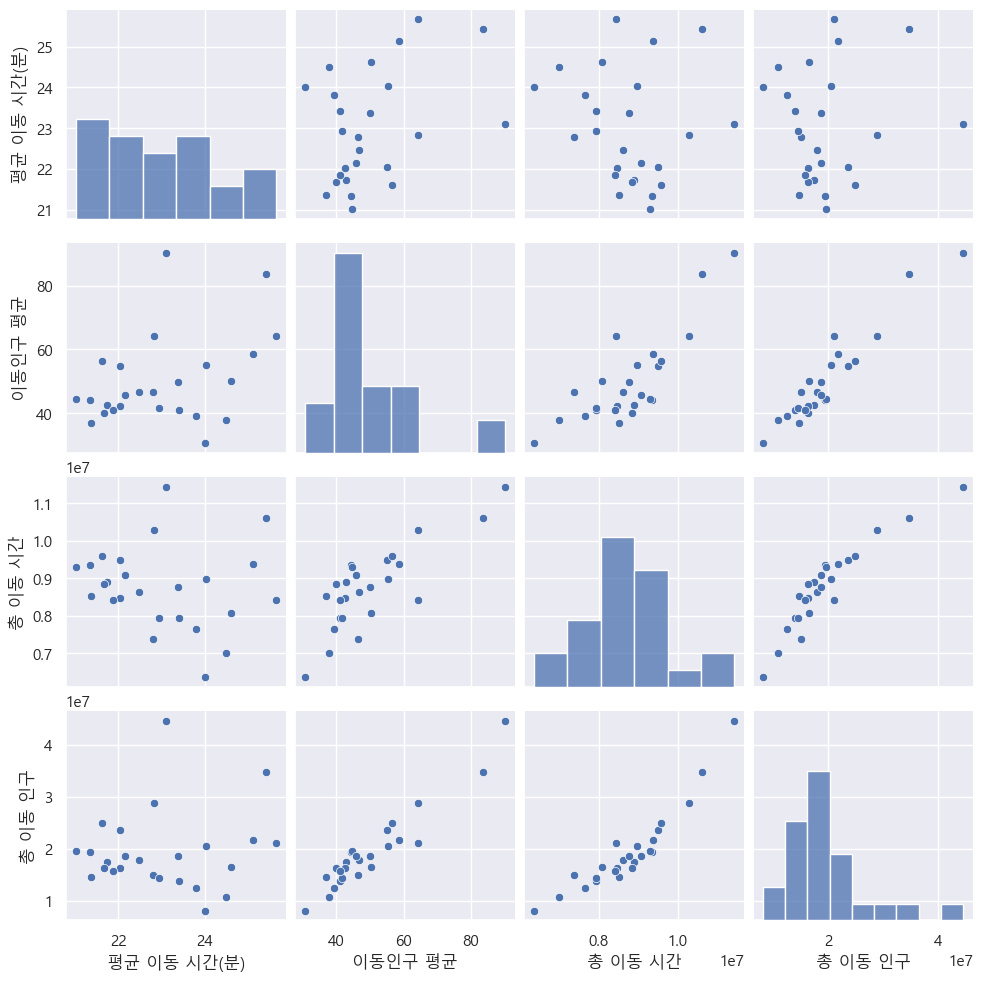

In [42]:
# 아래에 코드를 작성하고 결과를 확인합니다.
sns.pairplot(seoul_moving_mean_sum.drop(['도착 시군구 코드'], axis=1))
plt.show()

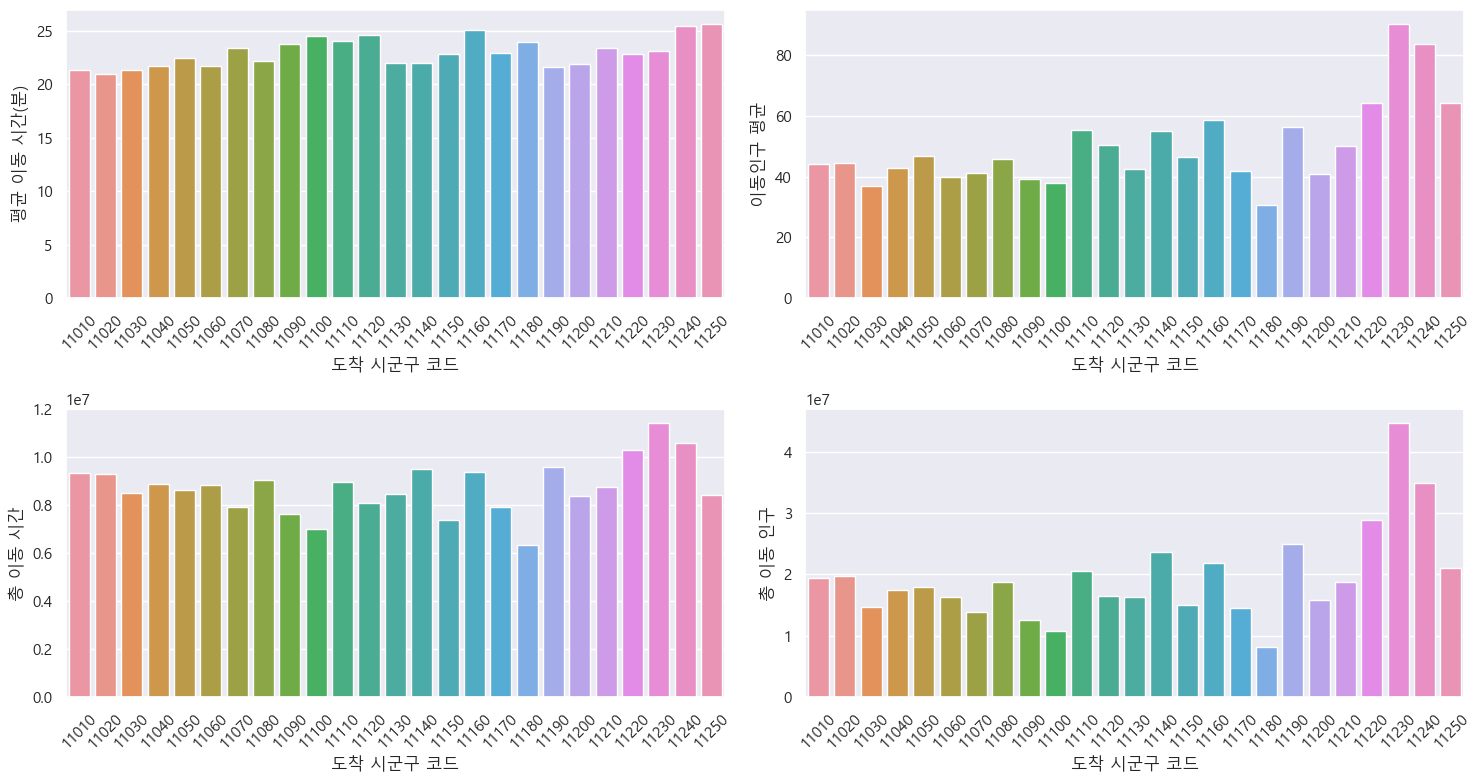

In [49]:
# 아래에 코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.barplot(x=seoul_moving_mean_sum['도착 시군구 코드'], y=seoul_moving_mean_sum['평균 이동 시간(분)'])
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.barplot(x=seoul_moving_mean_sum['도착 시군구 코드'], y=seoul_moving_mean_sum['이동인구 평균'])
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.barplot(x=seoul_moving_mean_sum['도착 시군구 코드'], y=seoul_moving_mean_sum['총 이동 시간'])
plt.xticks(rotation=45)

plt.subplot(2,2,4)
sns.barplot(x=seoul_moving_mean_sum['도착 시군구 코드'], y=seoul_moving_mean_sum['총 이동 인구'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [58]:
seoul_moving_mean_sum.columns

Index(['도착 시군구 코드', '평균 이동 시간(분)', '이동인구 평균', '총 이동 시간', '총 이동 인구'], dtype='object')

In [59]:
# 아래에 코드를 작성하고 결과를 확인합니다.
spst.pearsonr(seoul_moving_mean_sum['평균 이동 시간(분)'], seoul_moving_mean_sum['이동인구 평균'])

PearsonRResult(statistic=0.37309069339599177, pvalue=0.06622175286315453)

In [60]:
spst.pearsonr(seoul_moving_mean_sum['평균 이동 시간(분)'], seoul_moving_mean_sum['총 이동 시간'])

PearsonRResult(statistic=-0.14191351435382082, pvalue=0.49861041083467644)

In [61]:
spst.pearsonr(seoul_moving_mean_sum['평균 이동 시간(분)'], seoul_moving_mean_sum['총 이동 인구'])

PearsonRResult(statistic=0.09572729335221279, pvalue=0.6489798433889893)

In [62]:
spst.pearsonr(seoul_moving_mean_sum['이동인구 평균'], seoul_moving_mean_sum['총 이동 시간'])

PearsonRResult(statistic=0.8083131748107779, pvalue=1.0195987270470358e-06)

In [63]:
spst.pearsonr(seoul_moving_mean_sum['이동인구 평균'], seoul_moving_mean_sum['총 이동 인구'])

PearsonRResult(statistic=0.9513990213663914, pvalue=2.9620260187567816e-13)

In [64]:
spst.pearsonr(seoul_moving_mean_sum['총 이동 시간'], seoul_moving_mean_sum['총 이동 인구'])

PearsonRResult(statistic=0.9232983112844115, pvalue=4.896074716780721e-11)

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 총 이동 인구 수, 평균 이동인구가 가장 많은 구 top2는 11230(강남구), 11240(송파구)
# 2. 이동시간은 모든 구가 비슷하다.
# 3. (이동인구 평균과 총 이동 인구), (총 이동 시간과 총 이동 인구), (이동인구 평균과 총 이동 시간) 간의 연관성이 크다.

In [1]:
# 아래에 코드를 작성하고 결과를 확인합니다.
import pandas as pd
import numpy as np

seoul_moving = pd.read_csv('2. seoul_moving.csv', encoding='UTF8')
seoul_moving.head()

,Unnamed: 0,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [2]:
seoul_moving['이동인구(합)'].replace({'*':'1.5'}, inplace=True)
seoul_moving['이동인구(합)'].value_counts()

1.5        3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [3]:
seoul_moving.head()

,Unnamed: 0,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [4]:
seoul_moving = seoul_moving.astype({'이동인구(합)':'float64'})
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28923054 entries, 0 to 28923053
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   대상연월         int64  
 2   요일           object 
 3   도착시간         int64  
 4   출발 시군구 코드    int64  
 5   도착 시군구 코드    int64  
 6   성별           object 
 7   나이           int64  
 8   이동유형         object 
 9   평균 이동 시간(분)  int64  
 10  이동인구(합)      float64
dtypes: float64(1), int64(7), object(3)
memory usage: 2.4+ GB


In [5]:
data = seoul_moving.loc[seoul_moving['출발 시군구 코드'].between(11000, 11250, inclusive='both')]
data = data.loc[data['도착 시군구 코드'].between(11000, 11250, inclusive='both')]
data.head(30)

,Unnamed: 0,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,4,202204,일,0,11010,11010,F,10,EH,90,5.95
5,5,202204,일,0,11010,11010,F,10,WH,10,17.89
6,6,202204,일,0,11010,11010,F,15,EH,10,114.23
7,7,202204,일,0,11010,11010,F,15,HH,20,20.07
8,8,202204,일,0,11010,11010,F,15,HE,10,8.03
9,9,202204,일,0,11010,11010,F,15,HW,10,8.04


In [6]:
data1 = data.loc[data['도착시간'].between(5,23,inclusive='both')]
data1['도착시간'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23], dtype=int64)

In [7]:
data1.head()

,Unnamed: 0,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
2292255,0,202204,일,5,11010,11010,F,10,HE,10,5.96
2292256,1,202204,일,5,11010,11010,F,10,WH,10,5.88
2292257,2,202204,일,5,11010,11010,F,15,HE,10,4.06
2292258,3,202204,일,5,11010,11010,F,15,EW,10,4.06
2292259,4,202204,일,5,11010,11010,F,15,EH,10,10.08


In [8]:
seoul_moving_mean=data1.groupby('도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].mean()
seoul_moving_mean

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,21.349599,44.235978
1,11020,21.012462,44.516072
2,11030,21.364786,36.903883
3,11040,21.740324,42.685596
4,11050,22.474283,46.762548
5,11060,21.673451,39.942708
6,11070,23.412789,41.012753
7,11080,22.160283,45.816273
8,11090,23.811274,39.128470
9,11100,24.489976,37.882283


In [9]:
seoul_moving_sum=data1.groupby('도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].sum()
seoul_moving_sum

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,9356120,19385709.60
1,11020,9306020,19715322.61
2,11030,8514380,14707082.87
3,11040,8887140,17449273.95
4,11050,8625540,17947278.99
5,11060,8838130,16288077.28
6,11070,7939300,13907465.59
7,11080,9072420,18757182.35
8,11090,7649610,12570412.30
9,11100,6995880,10821566.75


In [10]:
seoul_moving_mean.rename(columns={'이동인구(합)':'이동인구 평균'}, inplace=True)
seoul_moving_mean

,도착 시군구 코드,평균 이동 시간(분),이동인구 평균
0,11010,21.349599,44.235978
1,11020,21.012462,44.516072
2,11030,21.364786,36.903883
3,11040,21.740324,42.685596
4,11050,22.474283,46.762548
5,11060,21.673451,39.942708
6,11070,23.412789,41.012753
7,11080,22.160283,45.816273
8,11090,23.811274,39.128470
9,11100,24.489976,37.882283


In [13]:
data1.loc[(data1['이동유형']=='HW') & data1['도착시간'].isin([7,8,9]) & data1['요일'].isin(['월','화','수','목','금'])]

,Unnamed: 0,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
3617382,100483,202204,월,7,11010,11010,F,0,HW,10,55.27
3617386,100487,202204,월,7,11010,11010,F,10,HW,10,697.04
3617397,100498,202204,월,7,11010,11010,F,15,HW,10,1545.38
3617402,100503,202204,월,7,11010,11010,F,20,HW,10,201.74
3617413,100514,202204,월,7,11010,11010,F,25,HW,10,351.18
...,...,...,...,...,...,...,...,...,...,...,...
6700642,1040133,202204,금,9,11250,11250,M,60,HW,10,1665.63
6700651,1040142,202204,금,9,11250,11250,M,65,HW,10,1169.67
6700665,1040156,202204,금,9,11250,11250,M,70,HW,10,683.19
6700669,1040160,202204,금,9,11250,11250,M,75,HW,10,463.85


In [15]:
a = data1.loc[(data1['이동유형']=='HE') & data1['도착시간'].isin([7,8,9]) & data1['요일'].isin(['월','화','수','목','금'])]

In [17]:
a.groupby(['출발 시군구 코드','도착 시군구 코드'], as_index=False)['이동인구(합)'].mean()

,출발 시군구 코드,도착 시군구 코드,이동인구(합)
0,11010,11010,194.797500
1,11010,11020,52.665705
2,11010,11030,15.218065
3,11010,11040,14.068639
4,11010,11050,7.043272
...,...,...,...
620,11250,11210,8.695625
621,11250,11220,41.794035
622,11250,11230,95.046770
623,11250,11240,165.422380


In [18]:
a.groupby(['출발 시군구 코드','도착 시군구 코드'], as_index=False)['이동인구(합)'].sum()

,출발 시군구 코드,도착 시군구 코드,이동인구(합)
0,11010,11010,91944.42
1,11010,11020,23172.91
2,11010,11030,5189.36
3,11010,11040,4445.69
4,11010,11050,1528.39
...,...,...,...
620,11250,11210,2504.34
621,11250,11220,16675.82
622,11250,11230,40014.69
623,11250,11240,75763.45


---